# Phishing Website Detection by ML Models <br>

<h3><p>Final Project of Information Security Management</p></h3>
    
<li> Aakash Kumar Yadav(18BCE2464)
<li> Saurav Rauniyar (18BCE2482)

In [69]:
# importing the pandas package

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

## Loading the data

In [2]:
legitimate_urls = pd.read_csv("extracted_csv_files/legitimate-urls.csv")
phishing_urls = pd.read_csv("extracted_csv_files/phishing-urls.csv")

## Getting familiar with data

In [3]:
legitimate_urls.head()

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,www.liquidgeneration.com,0,0,/,0,http,0,0,0,0,0,1,0,0,0,0,2
1,www.onlineanime.org,0,0,/,0,http,0,0,0,0,0,1,0,0,1,0,1
2,www.ceres.dti.ne.jp,0,0,/~nekoi/senno/senfirst.html,0,http,0,1,0,1,0,1,0,0,0,0,0
3,www.galeon.com,0,0,/kmh/,0,http,0,0,0,0,0,0,0,0,0,0,0
4,www.fanworkrecs.com,0,0,/,0,http,0,0,0,1,1,1,0,0,1,0,1


In [4]:
legitimate_urls.shape

(1017, 17)

In [5]:
phishing_urls.head()

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,asesoresvelfit.com,0,0,/media/datacredito.co/,0,http,0,0,0,0,0,1,0,1,0,1,1
1,caixa.com.br.fgtsagendesaqueconta.com,0,0,/consulta8523211/principal.php,0,http,0,1,1,0,0,1,0,1,1,0,1
2,hissoulreason.com,0,0,/js/homepage/home/,0,http,0,0,0,0,0,1,0,1,0,0,1
3,unauthorizd.newebpage.com,0,0,/webapps/66fbf/,0,http,0,0,0,0,0,1,0,1,1,0,1
4,133.130.103.10,0,1,/23/,0,http,0,2,0,1,0,1,0,1,0,0,1


In [6]:
print(phishing_urls.shape)

(998, 17)


## Data PreProcessing
#### Data is in two data frames so we merge them to make one dataframe


In [7]:
urls = legitimate_urls.append(phishing_urls)

In [8]:
urls.head()

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,www.liquidgeneration.com,0,0,/,0,http,0,0,0,0,0,1,0,0,0,0,2
1,www.onlineanime.org,0,0,/,0,http,0,0,0,0,0,1,0,0,1,0,1
2,www.ceres.dti.ne.jp,0,0,/~nekoi/senno/senfirst.html,0,http,0,1,0,1,0,1,0,0,0,0,0
3,www.galeon.com,0,0,/kmh/,0,http,0,0,0,0,0,0,0,0,0,0,0
4,www.fanworkrecs.com,0,0,/,0,http,0,0,0,1,1,1,0,0,1,0,1


In [9]:
urls.shape

(2015, 17)

In [10]:
urls.columns

Index(['Domain', 'Having_@_symbol', 'Having_IP', 'Path',
       'Prefix_suffix_separation', 'Protocol', 'Redirection_//_symbol',
       'Sub_domains', 'URL_Length', 'age_domain', 'dns_record',
       'domain_registration_length', 'http_tokens', 'label',
       'statistical_report', 'tiny_url', 'web_traffic'],
      dtype='object')

In [11]:
urls.describe()

,Having_@_symbol,Having_IP,Prefix_suffix_separation,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
count,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,0.011911,0.006452,0.160298,0.006452,0.689826,0.481886,0.682382,0.178660,0.948387,0.003474,0.495285,0.256079,0.063027,1.050620
std,0.108511,0.080082,0.366973,0.080082,0.890516,0.775458,0.701369,0.383162,0.530421,0.058852,0.500102,0.436575,0.243072,0.652258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000


#### Removing Unnecessary columns

In [12]:
# dropping domain name, path and protocol

urls = urls.drop(urls.columns[[0,3,5]],axis=1)

In [13]:
# checking the urls for null or missing values
urls.isnull().sum()

Having_@_symbol               0
Having_IP                     0
Prefix_suffix_separation      0
Redirection_//_symbol         0
Sub_domains                   0
URL_Length                    0
age_domain                    0
dns_record                    0
domain_registration_length    0
http_tokens                   0
label                         0
statistical_report            0
tiny_url                      0
web_traffic                   0
dtype: int64

#### Since we merged two dataframes top 1000 rows will have legitimate urls and bottom 1000 rows will have phishing urls. So if we split the data now and create a model for it will overfit so we need to shuffle the rows before splitting the data into training set and test set

In [53]:
#displaying summary of the dataset

urls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Having_@_symbol             2015 non-null   int64
 1   Having_IP                   2015 non-null   int64
 2   Prefix_suffix_separation    2015 non-null   int64
 3   Redirection_//_symbol       2015 non-null   int64
 4   Sub_domains                 2015 non-null   int64
 5   URL_Length                  2015 non-null   int64
 6   age_domain                  2015 non-null   int64
 7   dns_record                  2015 non-null   int64
 8   domain_registration_length  2015 non-null   int64
 9   http_tokens                 2015 non-null   int64
 10  label                       2015 non-null   int64
 11  statistical_report          2015 non-null   int64
 12  tiny_url                    2015 non-null   int64
 13  web_traffic                 2015 non-null   int64
dtypes: int64

In [63]:
#displaying data in ana easier manner to read
urls.head(10).T

,0,1,2,3,4,5,6,7,8,9
Having_@_symbol,0,0,0,0,0,0,0,0,0,0
Having_IP,0,0,0,0,0,0,0,0,0,0
Prefix_suffix_separation,0,0,1,0,0,0,0,0,0,0
Redirection_//_symbol,0,0,0,0,0,0,0,0,0,0
Sub_domains,1,0,2,0,0,2,1,0,0,0
URL_Length,2,0,1,0,0,0,1,0,0,0
age_domain,0,0,1,2,2,1,1,0,1,1
dns_record,0,0,1,0,0,0,0,0,1,1
domain_registration_length,1,0,1,0,2,1,1,1,1,1
http_tokens,0,0,0,0,0,0,0,0,0,0


In [14]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urls = urls.sample(frac=1).reset_index(drop=True)

In [15]:
urls.head()

,Having_@_symbol,Having_IP,Prefix_suffix_separation,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,0,0,0,0,1,2,0,0,1,0,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,2,1,1,1,1,0,1,1,0,1
3,0,0,0,0,0,0,2,0,0,0,0,0,0,2
4,0,0,0,0,0,0,2,0,2,0,0,0,0,1


#### Quick observation: 
The dataset has no null values. So further processing will not be done such as replace or deleting null rows. data is ready for traning, before training we visualise the data

# Visually Displaying data

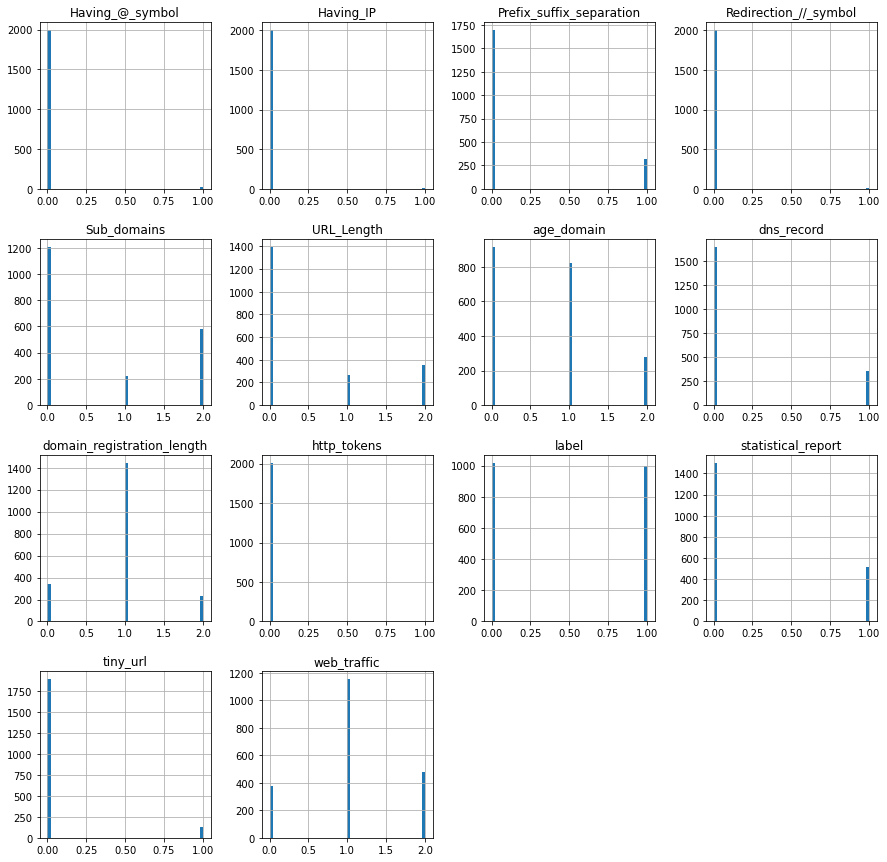

In [64]:
#Plotting the data distribution with a histogram
urls.hist(bins = 50,figsize = (15,15))
plt.show()

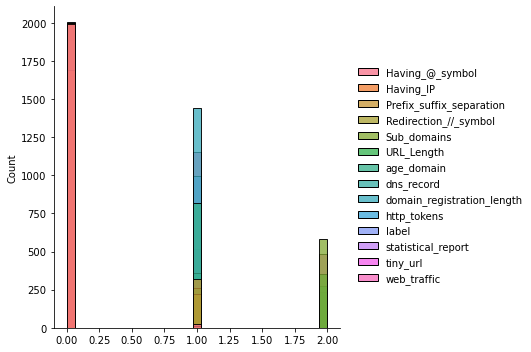

In [65]:
#overall distribution of continuous data variables
plot = sns.displot(urls)

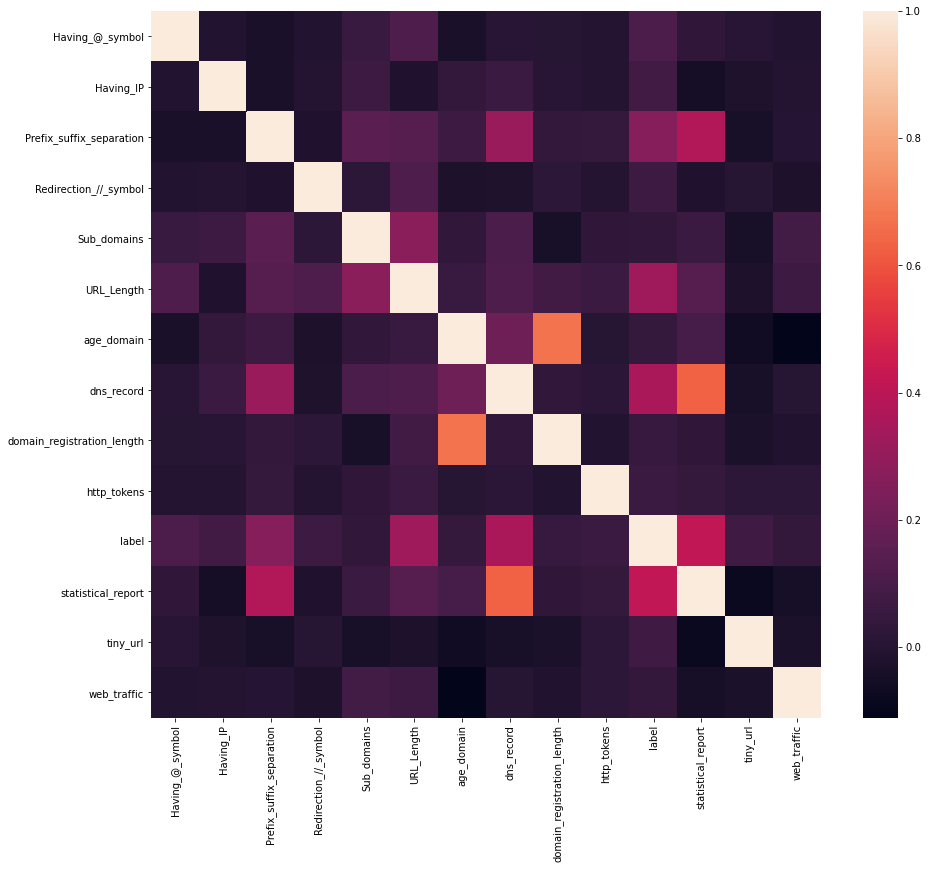

In [66]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(urls.corr())
plt.show()

<AxesSubplot:>

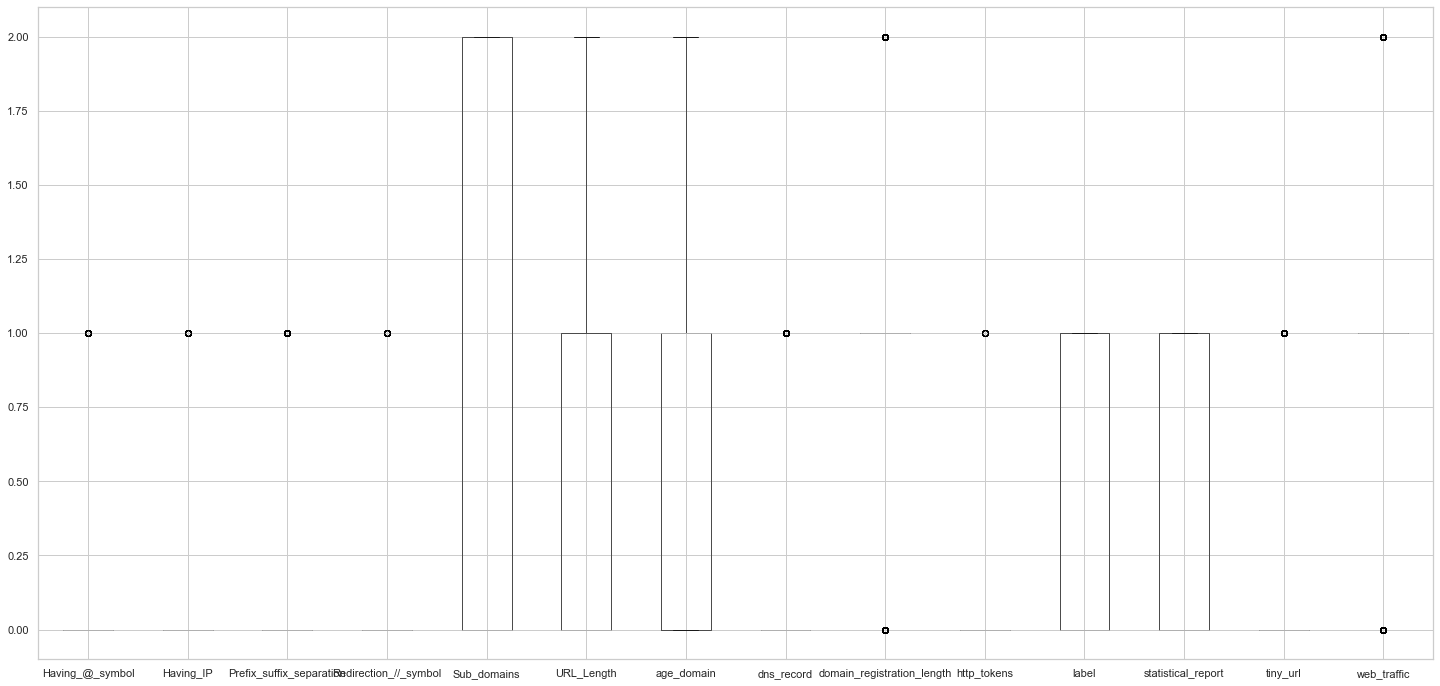

In [68]:
sns.set(style="whitegrid")
urls.boxplot(figsize=(25,12))

# Feature Selection 

In [16]:
labels = urls['label'] # target variable

In [17]:
urls_without_labels = urls.drop('label',axis=1) # feature variables

In [18]:
urls_without_labels.columns

Index(['Having_@_symbol', 'Having_IP', 'Prefix_suffix_separation',
       'Redirection_//_symbol', 'Sub_domains', 'URL_Length', 'age_domain',
       'dns_record', 'domain_registration_length', 'http_tokens',
       'statistical_report', 'tiny_url', 'web_traffic'],
      dtype='object')

In [19]:
labels.shape

(2015,)

# Splitting the data into train data and test data

In [70]:
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.20, random_state=100)

In [71]:
print((data_train.shape),(data_test.shape),(labels_train.shape),(labels_test.shape))

(1612, 13) (403, 13) (1612,) (403,)


In [72]:
labels_train.value_counts()

0    808
1    804
Name: label, dtype: int64

In [73]:
labels_test.value_counts()

0    209
1    194
Name: label, dtype: int64

# Machine Learning Models
From the dataset above, We have learnt that this is a supervised machine learning. This dataset uses a classification problem, it has input URL classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:

<li> Naive Bayes
<li> Decision Tree
<li> LogisticRegression
<li> RandomForestClassifiers
<li> XGBoost
<li> KNeighborsClassifier

In [74]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# 1. Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [25]:
gnb.fit(data_train,labels_train)

GaussianNB()

### predicting the result for test data

In [76]:
y_predict = gnb.predict(data_test)
y_test_NB = gnb.predict(data_test)
y_train_NB = gnb.predict(data_train)
model_score = model.score(data_test, labels_test)

## Performance Evaluation:

In [77]:
#computing the accuracy of the model performance
acc_train_model = accuracy_score(labels_train,y_train_NB)
acc_test_model = accuracy_score(labels_test,y_test_NB)

print("Naive Bayes: Accuracy on the Model: ",model_score)
print("Naive Bayes: Accuracy on training Data: {:.3f}".format(acc_train_model))
print("Naive Bayes: Accuracy on test Data: {:.3f}".format(acc_test_model))
print(metrics.classification_report(labels_test, y_predict))
print(metrics.confusion_matrix(labels_test, y_predict))

Naive Bayes: Accuracy on the Model:  0.8064516129032258
Naive Bayes: Accuracy on training Data: 0.530
Naive Bayes: Accuracy on test Data: 0.541
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       209
           1       1.00      0.05      0.09       194

    accuracy                           0.54       403
   macro avg       0.77      0.52      0.39       403
weighted avg       0.76      0.54      0.40       403

[[209   0]
 [185   9]]


In [78]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Naive Bayes', acc_train_model, acc_test_model)

# 2. Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
model = DecisionTreeClassifier()
# fit the model 
model.fit(data_train,labels_train)

# predicting the result for test data
y_predict_tree = model.predict(data_test)
y_test_tree = model.predict(data_test)
y_train_tree = model.predict(data_train)

tree_score = model.score(data_test, labels_test)

#### Performance Evaluation:

In [81]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(labels_train,y_train_tree)
acc_test_tree = accuracy_score(labels_test,y_test_tree)

print("Decision Tree: Accuracy on the Model: ",tree_score)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print(metrics.classification_report(labels_test, y_predict_tree))
print(metrics.confusion_matrix(labels_test, y_predict_tree))

Decision Tree: Accuracy on the Model:  0.8064516129032258
Decision Tree: Accuracy on training Data: 0.870
Decision Tree: Accuracy on test Data: 0.806
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       209
           1       0.86      0.71      0.78       194

    accuracy                           0.81       403
   macro avg       0.82      0.80      0.80       403
weighted avg       0.81      0.81      0.80       403

[[187  22]
 [ 56 138]]


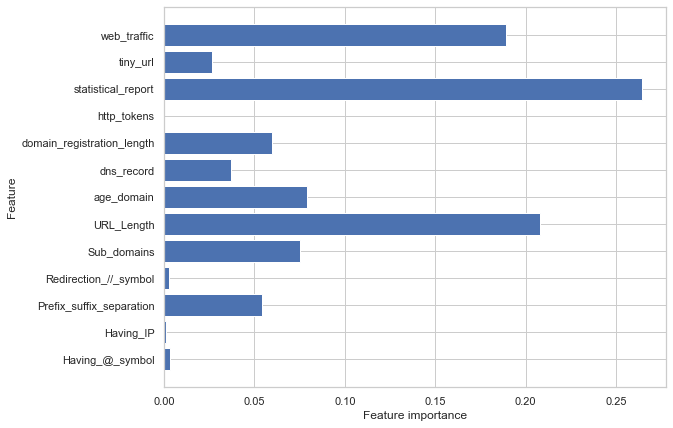

In [83]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = data_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [84]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# 3. Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the model
forest = RandomForestClassifier(n_estimators=100,max_depth=30,max_leaf_nodes=10000)

# fit the model 
forest.fit(data_train, labels_train)

# Predicting the result for Test Data
y_test_forest = forest.predict(data_test)
y_train_forest = forest.predict(data_train)
model_score = model.score(data_test, labels_test)

### Performance Evaluation

In [89]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(labels_train,y_train_forest)
acc_test_forest = accuracy_score(labels_test,y_test_forest)

print("Random forest: Accuracy on the Model: ",model_score)
print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print(metrics.classification_report(labels_test, y_test_forest))
print(metrics.confusion_matrix(labels_test, y_test_forest))

Random forest: Accuracy on the Model:  0.8064516129032258
Random forest: Accuracy on training Data: 0.870
Random forest: Accuracy on test Data: 0.809
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       209
           1       0.85      0.73      0.79       194

    accuracy                           0.81       403
   macro avg       0.82      0.81      0.81       403
weighted avg       0.81      0.81      0.81       403

[[185  24]
 [ 53 141]]


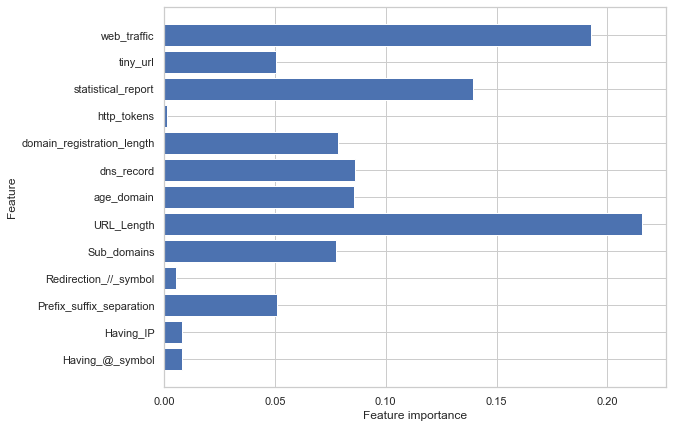

In [91]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = data_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [92]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random forest', acc_train_forest, acc_test_forest)

# 4. K Neighbors Classifier

In [93]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors =1)
# fit the model 
knn.fit(data_train,np.ravel(labels_train,order='C'))
#predicting the target value from the model for the samples
y_predict= knn.predict(data_test)

#predicting the target value from the model for the samples
y_test_knn = knn.predict(data_test)
y_train_knn = knn.predict(data_train)
model_score=knn.score(data_test, labels_test)

### Performance Evaluation:

In [94]:
#computing the accuracy of the model performance
acc_train_knn = accuracy_score(labels_train,y_train_knn)
acc_test_knn = accuracy_score(labels_test,y_test_knn)

print("KNeighborsClassifier: Accuracy on the Model: ",model_score)
print("KNeighborsClassifier: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNeighborsClassifier: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print(metrics.classification_report(labels_test, y_predict))
print(metrics.confusion_matrix(labels_test, y_predict))

KNeighborsClassifier: Accuracy on the Model:  0.7617866004962779
KNeighborsClassifier: Accuracy on training Data: 0.798
KNeighborsClassifier: Accuracy on test Data: 0.762
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       209
           1       0.77      0.72      0.74       194

    accuracy                           0.76       403
   macro avg       0.76      0.76      0.76       403
weighted avg       0.76      0.76      0.76       403

[[168  41]
 [ 55 139]]


In [98]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('KNeighborsClassifier', acc_train_knn, acc_test_knn)

In [99]:
# 5. XGBoost Classifier

# instantiate the model
xgb = XGBClassifier(use_label_encoder =False,learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(data_train, labels_train)
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(data_test)
y_train_xgb = xgb.predict(data_train)
model_score=xgb.score(data_test, labels_test)

[22:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Performance Evaluation:



In [100]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(labels_train,y_train_xgb)
acc_test_xgb = accuracy_score(labels_test,y_test_xgb)

print("XGBoost: Accuracy on the Model: ",model_score)
print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print(metrics.classification_report(labels_test, y_test_xgb))
print(metrics.confusion_matrix(labels_test, y_test_xgb))

XGBoost: Accuracy on the Model:  0.8138957816377171
XGBoost: Accuracy on training Data: 0.870
XGBoost : Accuracy on test Data: 0.814
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       209
           1       0.86      0.73      0.79       194

    accuracy                           0.81       403
   macro avg       0.82      0.81      0.81       403
weighted avg       0.82      0.81      0.81       403

[[186  23]
 [ 52 142]]


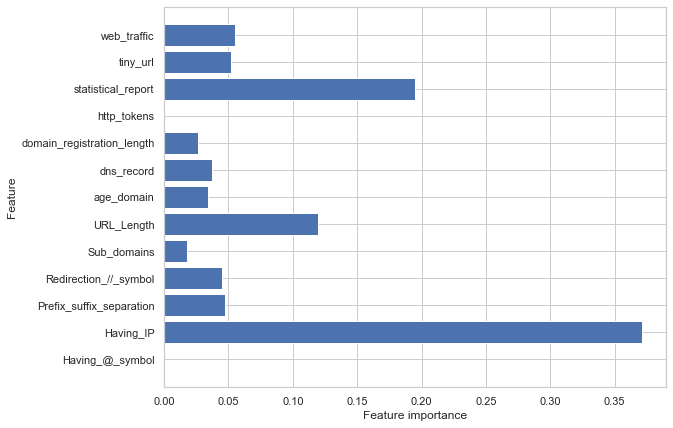

In [101]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = data_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [102]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

# Comparision of Models

To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [103]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Naive Bayes,0.530,0.541
1,Decision Tree,0.870,0.806
2,Random forest,0.870,0.809
3,KNeighborsClassifier,0.798,0.762
4,XGBoost,0.870,0.814


In [105]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
4,XGBoost,0.870,0.814
2,Random forest,0.870,0.809
1,Decision Tree,0.870,0.806
3,KNeighborsClassifier,0.798,0.762
0,Naive Bayes,0.530,0.541


From the above comparision, it is clear that the XGBoost Classifier works well with this dataset. and can be used to further study the problem

In [107]:
import pickle

In [57]:
# best model 

bmodel = RandomForestClassifier(max_depth = 5)
bmodel.fit(data_train, labels_train)
y_pred_train = bmodel.predict(data_train)
y_pred_test = bmodel.predict(data_test)

In [108]:
filename = 'RFmodel.sav'
pickle.dump(bmodel, open(filename, 'wb'))

In [111]:
filename = 'XGBoostModel.sav'

pickle.dump(xgb, open('GUI/'+filename, "wb"))


THE END